<a href="https://colab.research.google.com/github/LM1997610/AdavancedML/blob/main/AML_project/evaluation_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown 10p8sbqTj8kNFDqjJ8xZgCVDJaEzKJ3Xr
! unzip -q 'my_MAT.zip'
! rm my_MAT.zip

Downloading...
From: https://drive.google.com/uc?id=10p8sbqTj8kNFDqjJ8xZgCVDJaEzKJ3Xr
To: /content/my_MAT.zip
100% 1.96G/1.96G [00:39<00:00, 49.7MB/s]


In [2]:
%cd my_MAT

/content/my_MAT


In [3]:
# install packages

! pip install -q -r requirements.txt -f https://download.pytorch.org/whl/torch_stable.html
! pip install -q lpips

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.6 MB/s eta 0:00:00


## Generate Baseline Images:

In [ ]:
# baseline

! python generate_image.py \
  --network=pretrained_dir/CelebA-HQ_256.pkl \
  --resolution=256 \
  --dpath=train_val_test_split/test_sets/test \
  --mpath=train_val_test_split/test_sets/masks_large_256 \
  --outdir=images_baseline

Loading data from: train_val_test_split/test_sets/test
Loading mask from: train_val_test_split/test_sets/masks_large_256
Loading networks from: pretrained_dir/CelebA-HQ_256.pkl

 Processing: image_00028.png Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
 Processing: image_09879.png 

## Generate Our Images:

In [ ]:
# proposed

! python generate_image.py \
  --network=pretrained_dir/network-snapshot-000032.pkl \
  --resolution=256 \
  --dpath=train_val_test_split/test_sets/test \
  --mpath=train_val_test_split/test_sets/masks_large_256 \
  --outdir=images_our_large_mask

Loading data from: train_val_test_split/test_sets/test
Loading mask from: train_val_test_split/test_sets/masks_large_256
Loading networks from: pretrained_dir/network-snapshot-000032.pkl

 Processing: image_00028.png Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
 Processing: image_09879.png 

## Metrics Evaluation:

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from evaluatoin.cal_psnr_ssim_l1 import calculate_metrics as metrics
from evaluatoin.cal_lpips import calculate_metrics as metric_lpips

from tabulate import tabulate

In [ ]:
results_dict = {'baseline': {}, 'proposed': {}}

In [ ]:
# baseline

folder_gt = 'train_val_test_split/test_sets/test'
folder_1 = 'images_baseline'

psnr, ssim, dl1 = metrics(folder_1, folder_gt)

print('\n psnr: {}\n ssim: {}\n l1: {} \n'.format(round(psnr, 5),
                                                  round(ssim, 5),
                                                  round(dl1, 5)))

results_dict['baseline']['lpips'] = metric_lpips(folder_1, folder_gt)
print('\n lpips: %.4f' % results_dict['baseline']['lpips'])

results_dict['baseline']['psnr'] = psnr
results_dict['baseline']['ssim'] = ssim
results_dict['baseline']['dl1'] = dl1

length: 352

 psnr: 23.78569
 ssim: 0.77353
 l1: 0.03548 

length: 352
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 79.7MB/s]


Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth

 lpips: 0.1635


In [ ]:
# proposed

folder_gt = 'train_val_test_split/test_sets/test'
folder_2 = 'images_our_large_mask'

psnr, ssim, dl1 = metrics(folder_2, folder_gt)

print('\n psnr: {}\n ssim: {}\n l1: {} \n'.format(round(psnr, 5),
                                                  round(ssim, 5),
                                                  round(dl1, 5)))

results_dict['proposed']['lpips'] = metric_lpips(folder_2, folder_gt)
print('\n lpips: %.4f' % results_dict['proposed']['lpips'])

results_dict['proposed']['psnr'] = psnr
results_dict['proposed']['ssim'] = ssim
results_dict['proposed']['dl1'] = dl1

length: 352

 psnr: 23.60193
 ssim: 0.7772
 l1: 0.03723 

length: 352
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /usr/local/lib/python3.10/dist-packages/lpips/weights/v0.1/alex.pth

 lpips: 0.1684


In [ ]:
table_data = [(key.capitalize(), round(value["psnr"], 4),
                                 round(value["ssim"], 4),
                                 round(value["lpips"], 4),
                                 round(value["dl1"], 4)) for key, value in results_dict.items()]

headers = ["", "PSNR", "SSIM", "LPIPS", "L1"]

print()
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign='center', stralign="center"))


╒══════════╤═════════╤════════╤═════════╤════════╕
│          │  PSNR   │  SSIM  │  LPIPS  │   L1   │
╞══════════╪═════════╪════════╪═════════╪════════╡
│ Baseline │ 23.7857 │ 0.7735 │ 0.1635  │ 0.0355 │
├──────────┼─────────┼────────┼─────────┼────────┤
│ Proposed │ 23.6019 │ 0.7772 │ 0.1684  │ 0.0372 │
╘══════════╧═════════╧════════╧═════════╧════════╛


## Plot Images

In [ ]:
! gdown 1G65ehM_G85v-ZLmSkrwSwDxI7L2VJlG1

# load custom functions to display images
from visualize import do_plot, do_plot_batch

Downloading...
From: https://drive.google.com/uc?id=1G65ehM_G85v-ZLmSkrwSwDxI7L2VJlG1
To: /content/my_MAT/visualize.py
100% 4.38k/4.38k [00:00<00:00, 13.9MB/s]


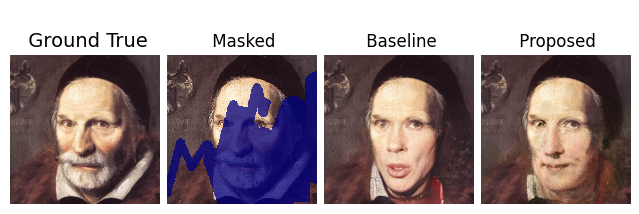

In [ ]:
# show one single image:

img_index = 151


do_plot(pos = img_index,
        ground_true_path ='train_val_test_split/test_sets/test',
        masks_path = 'train_val_test_split/test_sets/masks_large_256', # <-- small or large masks
        baseline_img_path = 'images_baseline',
        our_generated_img_path = 'images_our_large_mask', labels=True, save=False)

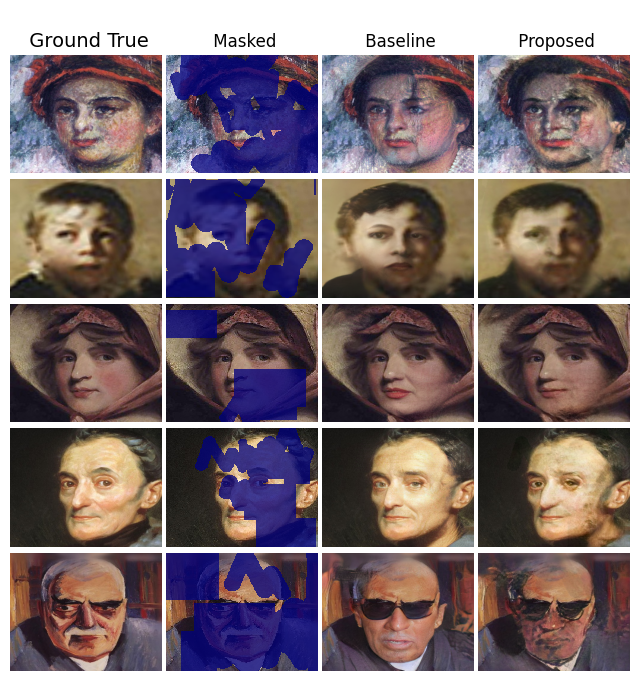

In [ ]:
# show batch of images:

images_to_show = [46, 30, 14, 38, 192]

do_plot_batch(images_to_show,
              ground_true_path = 'train_val_test_split/test_sets/test',
              masks_path = 'train_val_test_split/test_sets/masks_large_256',
              baseline_img_path = 'images_baseline',
              our_generated_img_path = 'images_our_large_mask')

---------------------------------------------------------

## Validation metrics during Training

Upon each model run, the resulting output folders were saved to the Drive.\
We load these outputs (*run_0.zip* and *run_1.zip*) to check the metrics on the validation set during the training process.

In [6]:
# back in parent directory

%cd ..

/content


In [7]:
# load run_0 folder from Drive:

! gdown 1xul7xVA9WWdbBgBw9vQaPRaQknFrwd2-
! unzip -q run_0.zip
! mv /content/output_path /content/run_0
! rm run_0.zip

Downloading...
From: https://drive.google.com/uc?id=1xul7xVA9WWdbBgBw9vQaPRaQknFrwd2-
To: /content/run_0.zip
100% 1.98G/1.98G [00:20<00:00, 95.2MB/s]


In [8]:
# load run_1 folder from Drive:

! gdown 1_fO6upZuWGmBqCktm4G5A5KyHZMzu0oI
! unzip -q run_1.zip
! mv /content/output_path /content/run_1
! rm run_1.zip

Downloading...
From: https://drive.google.com/uc?id=1_fO6upZuWGmBqCktm4G5A5KyHZMzu0oI
To: /content/run_1.zip
100% 1.98G/1.98G [00:22<00:00, 89.6MB/s]


In [9]:
import os
import json
from tabulate import tabulate
import matplotlib.pyplot as plt

In [10]:
folder_paths = ['run_0', 'run_1']
target_file = 'metric-our_psnr.jsonl'

data = {'psnr': [], 'ssim': [], 'l1': []}

In [11]:
for folder_path in folder_paths:
  original_data = []

  for root, dirs, files in os.walk(folder_path):
    if target_file in files:
      this_file = os.path.join(root, "metric-our_psnr.jsonl")

  with open(this_file, 'r') as json_file:
    json_list = list(json_file)


  for json_str in json_list:
    result = json.loads(json_str)
    original_data.append(result)

  for entry in original_data:
    data["psnr"].append(round(entry['results']["psnr"], 5))
    data["ssim"].append(round(entry['results']["ssim"], 5))
    data["l1"].append(round(entry['results']["l1"], 5))

In [12]:
transposed_data = list(zip(*data.values()))

row_names = list(data.keys())
table_data = list(zip(row_names, *transposed_data))

headers = ["Tick"] + list(range(0, 2*len(data["l1"]), 2))

print()
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", numalign='center', stralign="center"))


╒════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│  Tick  │    0    │    2    │    4    │    6    │    8    │   10    │
╞════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╡
│  psnr  │ 19.1348 │ 22.6005 │ 23.7199 │ 23.8677 │ 23.8523 │ 24.0128 │
├────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│  ssim  │ 0.72151 │ 0.76016 │ 0.78546 │ 0.78879 │ 0.78648 │ 0.7907  │
├────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│   l1   │ 0.06367 │ 0.04074 │ 0.03498 │ 0.0346  │ 0.03436 │ 0.03411 │
╘════════╧═════════╧═════════╧═════════╧═════════╧═════════╧═════════╛


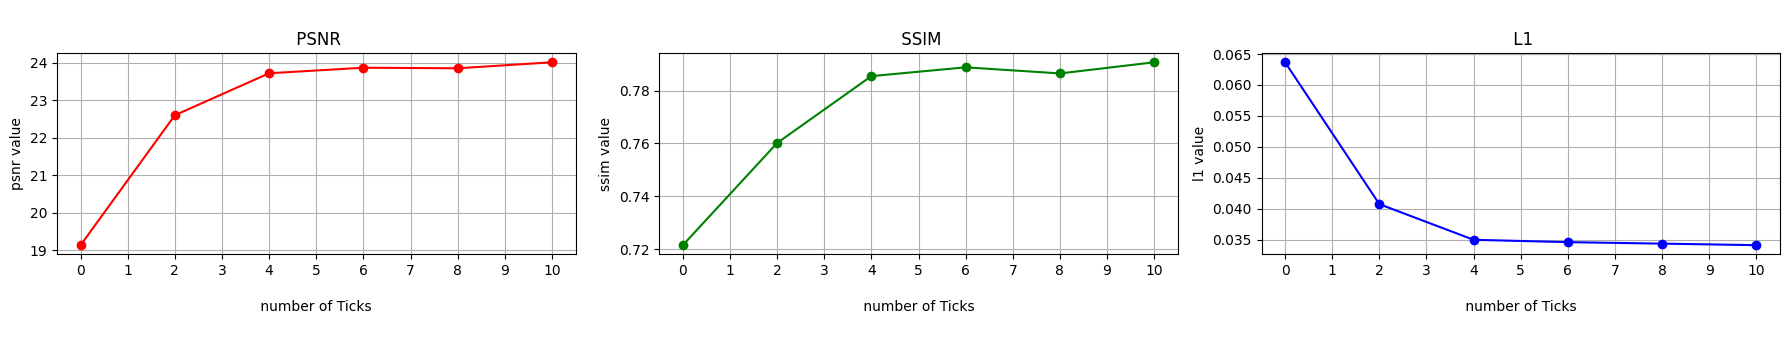

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3.5))


#plt.suptitle("Validation Metrics", fontsize=16)
plt.subplots_adjust(wspace=0.25, top=0.73)

x_values = list(range(0, 11, 2))

for i, key in enumerate(data.keys()):
  ax[i].plot(x_values, data[key], marker='o', linestyle='-', color= 'r' if i==0 else 'g' if i==1 else 'b')
  ax[i].set_title(f'\n {key.upper()}', fontsize= 12)
  ax[i].set_xlabel('\n number of Ticks \n')
  ax[i].set_ylabel(f'{key} value')
  ax[i].set_xticks(list(range(0, 11, 1)))
  ax[i].grid()

plt.tight_layout()
plt.savefig("metrics_validation_plot.png")
plt.show()